In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import os

In [3]:
df_train = []
for file_name in os.listdir('train'):
    df_train.append(pd.read_csv(os.path.join('train',file_name)))
df_train = pd.concat(df_train)

In [4]:
df = df_train.copy() # так привычнее

In [5]:
df.shape

(363387, 34)

In [6]:
df.head(3)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,location,equipment_dict,...,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price
0,Внедорожник 5 дв.,Volvo,https://auto.ru/cars/used/sale/volvo/xc90/1101...,0000CC,{'id': '0'},Продажа а/м осуществляется ОФИЦИАЛЬНЫМ ДИЛЕРОМ...,2.0 LTR,235 N12,Москва,"{'esp': True, 'airbag-driver': True, 'aux': Tr...",...,AUTOMATIC,EUROPEAN,2.0,NaN,ORIGINAL,ALL_WHEEL_DRIVE,LEFT,True,True,2799000
1,Седан,Volvo,https://auto.ru/cars/used/sale/volvo/s80/11013...,200204,{'id': '0'},При покупке автомобиля до 15 ноября \n► Выгод...,2.5 LTR,249 N12,Москва,"{'cruise-control': True, 'asr': True, 'tinted-...",...,AUTOMATIC,EUROPEAN,1.0,NaN,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,1277000
2,Внедорожник 5 дв.,Volvo,https://auto.ru/cars/new/sale/volvo/xc90/11009...,97948F,"{'id': '22148941', 'name': 'Momentum', 'availa...",Официальный дилер Volvo в Москве и Московской ...,2.0 LTR,249 N12,Москва,"{'multi-wheel': True, 'heated-wash-system': Tr...",...,AUTOMATIC,EUROPEAN,NaN,NaN,ORIGINAL,ALL_WHEEL_DRIVE,LEFT,True,True,4861200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363387 entries, 0 to 1849
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bodyType              363387 non-null  object 
 1   brand                 363387 non-null  object 
 2   car_url               363387 non-null  object 
 3   color                 363387 non-null  object 
 4   complectation_dict    363387 non-null  object 
 5   description           359623 non-null  object 
 6   engineDisplacement    363387 non-null  object 
 7   enginePower           363387 non-null  object 
 8   location              363387 non-null  object 
 9   equipment_dict        363387 non-null  object 
 10  fuelType              363387 non-null  object 
 11  image                 363387 non-null  object 
 12  mileage               363387 non-null  int64  
 13  modelDate             363387 non-null  int64  
 14  model_info            363387 non-null  object 
 15  mo

In [8]:
df.isna().sum()

bodyType                     0
brand                        0
car_url                      0
color                        0
complectation_dict           0
description               3764
engineDisplacement           0
enginePower                  0
location                     0
equipment_dict               0
fuelType                     0
image                        0
mileage                      0
modelDate                    0
model_info                   0
model_name                   0
name                         0
numberOfDoors                0
parsing_unixtime             0
priceCurrency                0
productionDate               0
sell_id                      0
super_gen                    0
vehicleConfiguration         0
vehicleTransmission          0
vendor                       0
Владельцы                73775
Владение                334627
ПТС                       2410
Привод                       0
Руль                         0
Состояние                    0
Таможня 

# Обрабатываем набор

In [9]:
def reformat_train_data(df):
    df.bodyType = df.bodyType.str.lower()\
                    .str.replace(' gran turismo','')\
                    .str.replace(' gran coupe','')\
                    .str.replace(' compact','')\
                    .str.replace(' roadster','')\
                    .str.replace(' single cab','')\
                    .str.replace(' lucida','')\
                    .str.replace(' marco polo','')\
                    .str.replace(' asti','')\
                    .str.replace(' plus','')\
                    .str.replace(' regius','')\
                    .str.replace(' double cab','')\
                    .str.replace(' gran tourer','')\
                    .str.replace(' lwb','')\
                    .str.replace(' xl','')\
                    .str.replace(' sportback','')\
                    .str.replace(' type-s','')\
                    .str.replace(' us market','')\
                    .str.replace(' scout','')\
                    .str.replace(' emina','')\
                    .str.replace(' l2','')\
                    .str.replace(' crewmax','')\
                    .str.replace(' extralong','')\
                    .str.replace(' swb','')\
                    .str.replace(' pullman','')\
                    .str.replace(' extra','')\
                    .str.replace(' phv','')\
                    .str.replace(' l3','')\
                    .str.replace(' all-terrain','')\
                    .str.replace(' del sol','')\
                    .str.replace(' life maxi','')\
                    .str.replace(' 76','')\
                    .str.replace(' spada','')\
                    .str.replace(' lucida','')\
                    .str.replace(' gita','')\
                    .str.replace(' alltrack','')\
                    .str.replace(' blit','')\
                    .str.replace(' kasten','')\
                    .str.replace(' allspace','')\
                    .str.replace(' arctic trucks','')\
                    .str.replace(' 78','')\
                    .str.replace(' noah','')\
                    .str.replace(' l1','')\
                    .str.replace(' japan market','')\
                    .str.replace(' fielder','')\
                    .str.replace(' ardeo','')\
                    .str.replace(' 79','')\
                    .str.replace(' runx','')\
                    .str.replace(' gracia','')\
                    .str.replace(' asti','')\
                    .str.replace(' plus','')\
                    .str.replace(' marco polo','')\
                    .str.replace(' single cab','')\
                    .str.replace(' cross','')\
                    .str.replace(' gracia','')\
                    .str.replace(' liftback','')\
                    .str.replace(' xc','')\
                    .str.replace(' latio','')\
                    .str.replace(' spike','')\
                    .str.replace(' bed','')\
                    .str.replace(' 4x4','')\
                    .str.replace(' 120','')\
                    .str.replace(' regius','')\
                    .str.replace(' california','')\
                    .str.replace(' life','')\
                    .str.replace(' maxi','')\
                    .str.replace(' axio','')\
                    .str.replace(' gt','')\
                    .str.replace(' t150','')\
                    .str.replace(' spaceback','')\
                    .str.replace(' regular cab','')\
                    .str.replace(' cargo','')\
                    .str.replace(' long','')\
                    .str.replace(' l','')\
                    
                    
    colors = {
    '040001':'чёрный',
    '0000CC':'синий',
    'FAFBFB':'белый',
    '97948F':'серый',
    'CACECB':'серый',
    '200204':'чёрный',
    'EE1D19':'красный',
    'FFC0CB':'розовый',
    'C49648':'золотистый',
    '22A0F8':'голубой',
    'FF8649':'оранжевый',
    '007F00':'зелёный',
    'DEA522':'золотистый',
    '660099':'фиолетовый',
    '4A2197':'фиолетовый',
    'FFD600':'жёлтый'
    }
    df.color = df.color.map(colors)
    
    fuelTypes = {
    'DIESEL':'дизель',
    'GASOLINE':'бензин',
    'LPG':'газ',
    'HYBRID':'гибрид',
    'ELECTRO':'электро',
    }
    df.fuelType = df.fuelType.map(fuelTypes)
    
    df.modelDate = df.modelDate.astype(float)
    
    df.numberOfDoors = df.numberOfDoors.astype(float)
    
    df.loc[df.brand=='Mercedes-Benz','brand'] = 'MERCEDES'
    df.brand = df.brand.str.upper()
    
    transmissionTypes = {
    'AUTOMATIC':'автоматическая',
    'MECHANICAL':'механическая',
    'ROBOT':'роботизированная',
    'VARIATOR':'вариатор'
    }
    df.vehicleTransmission = df.vehicleTransmission.map(transmissionTypes)
    
    pTypes = {
    'ALL_WHEEL_DRIVE':'полный',
    'REAR_DRIVE':'задний',
    'FORWARD_CONTROL':'передний',
    }
    df['Привод'] = df['Привод'].map(pTypes)
    
    pTypes = {
    'LEFT':'Левый',
    'RIGHT':'Правый',
    }
    df['Руль'] = df['Руль'].map(pTypes)
    
    pTypes = {
    True:'Не требует ремонта',
    }
    df['Состояние'] = df['Состояние'].map(pTypes)
    
    pTypes = {
    1:'1\xa0владелец',
    2:'2\xa0владельца',
    3:'3 или более',
    }
    df['Владельцы'] = df['Владельцы'].map(pTypes)
    
    pTypes = {
    'ORIGINAL':'Оригинал',
    'DUPLICATE':'Дубликат'
    }
    df['ПТС'] = df['ПТС'].map(pTypes)
    
    pTypes = {
    True:'Растаможен',
    }
    df['Таможня'] = df['Таможня'].map(pTypes)
    
    df.model_name = df.model_name.str.upper()
    
    

In [10]:
df = df_train.copy() # так привычнее
reformat_train_data(df)
df.drop_duplicates(['car_url'], inplace=True)
df.reset_index(inplace=True)

In [11]:
df.shape

(36210, 35)

# Анализирум колонки

## bodyType

In [12]:
df.bodyType.unique()

array(['внедорожник 5 дв.', 'седан', 'универсал 5 дв.', 'хэтчбек 5 дв.',
       'купе-хардтоп', 'купе', 'хэтчбек 3 дв.', 'лифтбек', 'кабриолет',
       'родстер', 'компактвэн', 'минивэн', 'внедорожник 3 дв.',
       'пикап двойная кабина', 'пикап одинарная кабина', 'седан 2 дв.',
       'микровэн', 'универсал 3 дв.1', 'седан-хардтоп',
       'внедорожник открытый', 'фургон', 'фастбек', 'лимузин',
       'пикап полуторная кабина', 'тарга'], dtype=object)

In [13]:
df.bodyType.nunique()

25

## brand

In [14]:
df.brand.value_counts()

VOLKSWAGEN    3769
MERCEDES      3738
BMW           3730
NISSAN        3621
TOYOTA        3517
AUDI          3457
SKODA         3422
MITSUBISHI    3389
VOLVO         2796
HONDA         1998
LEXUS         1553
INFINITI      1220
Name: brand, dtype: int64

## color

In [15]:
df.color.value_counts()

чёрный        12813
серый          8190
белый          7050
синий          3643
красный        1530
золотистый      891
зелёный         881
фиолетовый      420
голубой         417
жёлтый          203
оранжевый       163
розовый           9
Name: color, dtype: int64

## car_url

In [16]:
df.car_url.head()

0    https://auto.ru/cars/used/sale/volvo/xc90/1101...
1    https://auto.ru/cars/used/sale/volvo/s80/11013...
2    https://auto.ru/cars/new/sale/volvo/xc90/11009...
3    https://auto.ru/cars/used/sale/volvo/xc60/1100...
4    https://auto.ru/cars/used/sale/volvo/s60/11014...
Name: car_url, dtype: object

In [17]:
df.car_url.sample(1).values

array(['https://auto.ru/cars/used/sale/toyota/hiace/1099124917-a4bf7383/'],
      dtype=object)

## complectiaion_dict

In [18]:
df.complectation_dict.sample(1).values

array(["{'id': '21555601', 'name': 'Inscription', 'available_options': ['multi-wheel', 'airbag-passenger', 'roof-rails', 'decorative-interior-lighting', 'bas', 'lock', 'door-sill-panel', 'electro-mirrors', 'easy-trunk-opening', 'mirrors-heat', 'volume-sensor', 'leather', 'driver-seat-memory', 'glonass', 'start-stop-function', 'automatic-lighting-control', 'passenger-seat-updown', 'collision-prevention-assist', 'computer', 'high-beam-assist', 'seat-transformation', 'light-cleaner', 'dha', 'airbag-side', 'electronic-gage-panel', 'electro-trunk', 'auto-cruise', 'abs', 'wheel-leather', 'climate-control-2', 'auto-mirrors', 'asr', 'esp', 'usb', 'audiopreparation', 'audiosystem-tv', 'lane-keeping-assist', 'front-centre-armrest', 'front-seat-support', 'rear-camera', 'servo', 'drl', 'electro-window-back', 'reduce-spare-wheel', 'body-mouldings', 'park-assist-f', '19-inch-wheels', 'led-lights', 'music-super', 'park-assist-r', 'knee-airbag', 'airbag-driver', 'isofix', 'roller-blinds-for-rear-side-

## description

In [19]:
df.description.sample(1).values

array(['-Оригинальный ПТС.  \t\n-Сервисное обслуживание. \n-Полный комплект документов и ключей. \n-Без нареканий по технической части.\n\n-Мы принимаем любые легковые и коммерческие автомобили независимо от марки, года выпуска, пробега и состояния автомобиля. \n-В наличии более 100 проверенных и готовых к продаже автомобилей. \n-Более 80 комплектов шин, дисков, колес в сборе. \n-Все автомобили проходят комплексную проверку - техническую, криминалистическую, проверку истории кузовных ремонтов сертифицированными специалистами. \n-Мы предоставляем гарантию юридической чистоты в соответствии с законодательством РФ. \n-Мы работаем каждый день с 8:00 до 22:00.\n\nУслуги: \n• Срочный выкуп Вашего автомобиля \n• Выкуп кредитных а/м \n• Trade-in - обмен Вашего автомобиля на новый или с пробегом (возможна доплата с любой стороны) \n• Выездная оценка Вашего а/м \n• Комиссионная продажа (на Ваших условиях) \n• Аукцион \n• Кредитование \n• Страхование КАСКО, ОСАГО \n• Дополнительное оборудование \

## engineDisplacement

In [26]:
df.engineDisplacement.value_counts()

2.0 LTR    9648
1.6 LTR    4750
3.0 LTR    3615
1.8 LTR    2592
2.5 LTR    2337
1.4 LTR    2064
2.4 LTR    2062
3.5 LTR    1523
1.5 LTR     712
1.9 LTR     609
1.2 LTR     509
2.9 LTR     492
1.3 LTR     476
4.4 LTR     396
4.0 LTR     393
4.5 LTR     353
2.8 LTR     288
3.7 LTR     277
4.7 LTR     272
2.1 LTR     230
3.2 LTR     217
2.7 LTR     207
2.3 LTR     203
5.7 LTR     195
4.2 LTR     188
5.5 LTR     167
5.6 LTR     166
3.6 LTR     162
2.2 LTR     145
4.6 LTR     142
5.0 LTR     107
3.3 LTR      70
1.7 LTR      59
0.0 LTR      59
3.8 LTR      54
0.7 LTR      53
3.1 LTR      51
4.8 LTR      46
1.0 LTR      42
6.0 LTR      39
4.1 LTR      37
3.4 LTR      35
4.3 LTR      35
2.6 LTR      32
6.2 LTR      24
5.4 LTR      22
5.2 LTR      11
0.6 LTR       9
6.3 LTR       7
5.9 LTR       7
1.1 LTR       7
6.6 LTR       7
4.9 LTR       3
5.8 LTR       2
5.3 LTR       1
3.9 LTR       1
Name: engineDisplacement, dtype: int64

## enginePower

In [27]:
df.enginePower.value_counts()

249 N12    2701
150 N12    2560
110 N12    1258
190 N12    1091
140 N12    1039
           ... 
40 N12        1
387 N12       1
32 N12        1
183 N12       1
431 N12       1
Name: enginePower, Length: 318, dtype: int64

## location

In [28]:
df.location.value_counts()

Москва              23945
Санкт-Петербург      2991
Нижний Новгород       495
Химки                 455
Воронеж               425
                    ...  
Котово                  1
Серебряные Пруды        1
Ковылкино               1
Советск                 1
Полотняный Завод        1
Name: location, Length: 745, dtype: int64

## equipment_dict

In [29]:
df.equipment_dict.sample(1).values

array(["{'cruise-control': True, 'airbag-driver': True, 'electro-window-front': True, 'light-sensor': True, 'multi-wheel': True, 'audiopreparation': True, 'xenon': True, 'airbag-passenger': True, 'front-centre-armrest': True, 'computer': True, 'roof-rails': True, 'wheel-power': True, 'rear-camera': True, 'lock': True, 'light-cleaner': True, 'airbag-rear-side': True, 'electro-window-back': True, 'start-button': True, 'ptf': True, 'rain-sensor': True, 'airbag-side': True, 'multizone-climate-control': True, 'park-assist-f': True, 'dark-interior': True, 'rear-seats-heat': True, 'leather': True, 'abs': True, 'bluetooth': True, 'front-seats-heat': True, 'wheel-leather': True, 'immo': True, 'park-assist-r': True, 'third-rear-headrest': True}"],
      dtype=object)

## fuelType

In [30]:
df.fuelType.value_counts()

бензин     29429
дизель      6411
гибрид       306
электро       59
Name: fuelType, dtype: int64

In [31]:
df_train.fuelType.value_counts()

GASOLINE    280335
DIESEL       80815
HYBRID        2014
ELECTRO        218
LPG              5
Name: fuelType, dtype: int64

## image

In [32]:
df.image.iloc[0]

'//avatars.mds.yandex.net/get-autoru-vos/2092864/1e853bed0c81cdf5f57d0447b696ba17/small'

## mileage

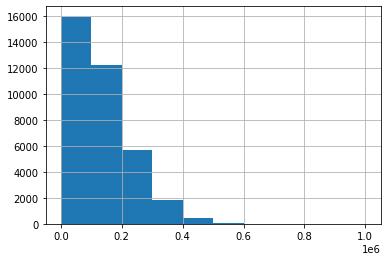

In [33]:
df.mileage.hist();

## modelDate             

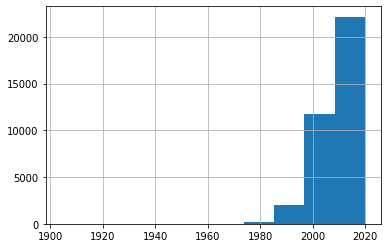

In [34]:
df.modelDate.hist();

## model_name

In [35]:
df.model_name.value_counts()

Octavia            1417
Outlander          1060
X-Trail             818
Polo                733
3 серии             720
                   ... 
Verso-S               1
Bassara               1
LM                    1
Terrano Regulus       1
Caravan               1
Name: model_name, Length: 537, dtype: int64

## name

In [36]:
df.name

0                2.0d AT (235 л.с.) 4WD
1                     2.5 AT (249 л.с.)
2                 2.0 AT (249 л.с.) 4WD
3                2.4d AT (190 л.с.) 4WD
4                     2.4 AT (170 л.с.)
                      ...              
36205           3.0d AMT (245 л.с.) 4WD
36206    45 TFSI 2.0 AMT (245 л.с.) 4WD
36207            3.0 AMT (300 л.с.) 4WD
36208            2.0 AMT (211 л.с.) 4WD
36209            2.4d AT (215 л.с.) 4WD
Name: name, Length: 36210, dtype: object

## numberOfDoors         

In [37]:
df.numberOfDoors.value_counts()

5.0    22449
4.0    12263
2.0      961
3.0      536
0.0        1
Name: numberOfDoors, dtype: int64

## parsing_unixtime

<AxesSubplot:>

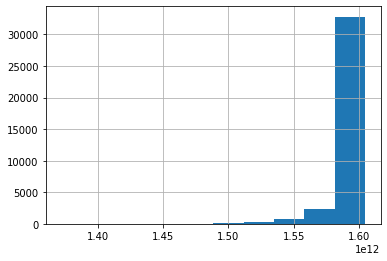

In [38]:
df.parsing_unixtime.hist()

## priceCurrency

In [39]:
df.priceCurrency.value_counts()

RUR    36210
Name: priceCurrency, dtype: int64

## productionDate

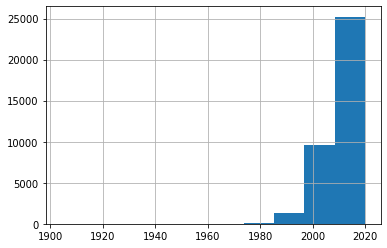

In [40]:
df.productionDate.hist();

## sell_id

In [41]:
df.sell_id

0        1101191623-464cf4be
1        1101345022-3e0e4f8c
2        1100911068-4dd8f660
3        1100336634-a6643416
4        1101497967-8c590a51
                ...         
36205    1062506820-c3420f81
36206    1101491025-4b8ebe4d
36207    1100159814-dbcfcde7
36208    1101243826-9f0938e2
36209    1101393051-9b4122a2
Name: sell_id, Length: 36210, dtype: object

## vehicleConfiguration

In [42]:
df.vehicleConfiguration.value_counts()

ALLROAD_5_DOORS AUTOMATIC 2.0    2314
ALLROAD_5_DOORS AUTOMATIC 3.0    2268
ALLROAD_5_DOORS VARIATOR 2.0     2234
SEDAN AUTOMATIC 2.0              1607
SEDAN MECHANICAL 1.6              992
                                 ... 
ALLROAD_5_DOORS ROBOT 2.1           1
ROADSTER AUTOMATIC 4.7              1
LIFTBACK AUTOMATIC 1.4              1
VAN AUTOMATIC 2.5                   1
MINIVAN MECHANICAL 3.0              1
Name: vehicleConfiguration, Length: 619, dtype: int64

## vehicleTransmission

In [32]:
df.vehicleTransmission.value_counts()

автоматическая      24825
механическая         8083
роботизированная     7236
Name: vehicleTransmission, dtype: int64

In [44]:
df_train.vehicleTransmission.value_counts()

AUTOMATIC     192415
ROBOT          66037
MECHANICAL     56086
VARIATOR       48849
Name: vehicleTransmission, dtype: int64

## vendor

In [108]:
df.vendor.value_counts()

EUROPEAN    17551
JAPANESE    11330
Name: vendor, dtype: int64

## Другое

In [107]:
df['Привод'].value_counts()

полный      14887
передний    11702
задний       2292
Name: Привод, dtype: int64

In [60]:
df['Руль'].value_counts()

Левый    45204
Name: Руль, dtype: int64

In [61]:
df['Состояние'].value_counts()

Не требует ремонта    46225
Name: Состояние, dtype: int64

In [45]:
df['Владельцы'].value_counts()

3 или более    13121
1 владелец      8738
2 владельца     7731
Name: Владельцы, dtype: int64

In [63]:
df['ПТС'].value_counts()

Оригинал    42461
Дубликат     3511
Name: ПТС, dtype: int64

In [64]:
df['Таможня'].value_counts()

Растаможен    46225
Name: Таможня, dtype: int64

In [122]:
df['Владение'].value_counts() 

{'year': 2019, 'month': 8}     127
{'year': 2018, 'month': 11}    126
{'year': 2018, 'month': 10}    119
{'year': 2018, 'month': 12}    118
{'year': 2019, 'month': 6}     109
                              ... 
{'year': 2001, 'month': 5}       1
{'year': 1991, 'month': 11}      1
{'year': 2004, 'month': 10}      1
{'year': 1992, 'month': 2}       1
{'year': 2002, 'month': 1}       1
Name: Владение, Length: 255, dtype: int64

## Дополнительные колонки

### model

## description

In [36]:
df.description

0       - выгода 60 000 рублей при покупке авто в Trad...
1       Цена на автомобиль указана с учетом скидки от ...
2       Цена на автомобиль указана с учетом скидки от ...
3       РОЛЬФ - Официальный дилер и Лучший дилер Росси...
4       Цена на автомобиль указана с учетом скидки от ...
                              ...                        
1350    Продажа от официального дилера Nissan Автоцент...
1351    Один собственник! ПТС оригинал!  Отличное сост...
1352    Nissan Armada I Внедорожник 5 дв. 5.6 AT (309 ...
1353    ЛОТ: 01227498\nАвтопрага Восток\n\nВы можете п...
1354    Внимание! Только для клиентов AVILON Автомобил...
Name: description, Length: 46225, dtype: object

In [68]:
df.complectation_dict

0       {'id': '6937724', 'name': 'sDrive18i Локальная...
1       {'id': '21037026', 'name': '520d xDrive', 'ava...
2       {'id': '21485456', 'name': 'xDrive30d M Sport'...
3                                             {'id': '0'}
4       {'id': '21766793', 'name': '320d xDrive', 'ava...
                              ...                        
1350                                          {'id': '0'}
1351                                          {'id': '0'}
1352                                          {'id': '0'}
1353                                          {'id': '0'}
1354                                          {'id': '0'}
Name: complectation_dict, Length: 46225, dtype: object

In [69]:
df.equipment_dict

0       {'esp': True, 'airbag-driver': True, 'aux': Tr...
1       {'cruise-control': True, 'asr': True, 'esp': T...
2       {'asr': True, 'esp': True, 'adaptive-light': T...
3       {'asr': True, 'tinted-glass': True, 'adaptive-...
4       {'cruise-control': True, 'asr': True, 'esp': T...
                              ...                        
1350    {'electro-window-back': True, 'asr': True, 'st...
1351    {'alloy-wheel-disks': True, 'airbag-driver': T...
1352    {'cruise-control': True, 'asr': True, 'tinted-...
1353    {'airbag-driver': True, 'isofix': True, 'usb':...
1354    {'cruise-control': True, 'esp': True, 'airbag-...
Name: equipment_dict, Length: 46225, dtype: object

In [70]:
df.model_info

0       {'code': 'X1', 'name': 'X1', 'ru_name': 'Х1', ...
1       {'code': '5ER', 'name': '5 серии', 'ru_name': ...
2       {'code': 'X4', 'name': 'X4', 'ru_name': 'Х4', ...
3       {'code': '3ER', 'name': '3 серии', 'ru_name': ...
4       {'code': '3ER', 'name': '3 серии', 'ru_name': ...
                              ...                        
1350    {'code': 'TIIDA', 'name': 'Tiida', 'ru_name': ...
1351    {'code': 'X_TRAIL', 'name': 'X-Trail', 'ru_nam...
1352    {'code': 'ARMADA', 'name': 'Armada', 'ru_name'...
1353    {'code': 'NOTE', 'name': 'Note', 'ru_name': 'Н...
1354    {'code': 'X_TRAIL', 'name': 'X-Trail', 'ru_nam...
Name: model_info, Length: 46225, dtype: object

In [71]:
df.super_gen

0       {'id': '8246645', 'name': 'I (E84) Рестайлинг'...
1       {'id': '20856169', 'name': 'VII (G30/G31)', 'r...
2       {'id': '21203948', 'name': 'II (G02)', 'ru_nam...
3       {'id': '21398591', 'name': 'VII (G2x)', 'ru_na...
4       {'id': '21398591', 'name': 'VII (G2x)', 'ru_na...
                              ...                        
1350    {'id': '20506271', 'name': 'II', 'ru_name': '2...
1351    {'id': '7024112', 'name': 'II Рестайлинг', 'ru...
1352    {'id': '20282139', 'name': 'I', 'ru_name': '1'...
1353    {'id': '4994902', 'name': 'I Рестайлинг', 'ru_...
1354    {'id': '3480713', 'name': 'I', 'ru_name': '1',...
Name: super_gen, Length: 46225, dtype: object

In [101]:
df.drop_duplicates().shape

(72226, 35)

In [102]:
df.shape

(99017, 35)

In [20]:
df.to_csv('train.csv')